Simple linear regression using tensorflow Tapes

1. Start with a random value for weights **m** and **C**.
2. Use it to predict Y and compute the loss (mean squared error)
3. From m and C, subtract the partial derivative (of the loss function with respect to the weights) multiplied with a learning rate (α).

<p align='center'>
m=m–α∗(δJδm)
</p>
<p align='center'>c=c–α∗(δJδc)</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from time import perf_counter

from dataset.create_dataset import create_dataset

In [ ]:
# the training dataset

# linear
# x_train = np.linspace(0, 10, 100)
# y_train = x_train + np.random.normal(0,1,100)

# using kate's work
# X, Y = create_dataset(nb=10)
# x_train, y_train = X.to_numpy(), Y.to_numpy()

#using dataset created previously using kate's work
data = pd.read_csv('dataset/dataset.csv')
X, Y = data['X'], data['Y']
x_train, y_train = X.to_numpy(), Y.to_numpy()

In [ ]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

In [ ]:
# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

In [ ]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
t1 = perf_counter()

# train model
for epoch in range(training_epochs):
    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [weight,bias])

        # Adjust weights
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

print(f'\nexecution time: {perf_counter() - t1}')

In [ ]:
print(weight.numpy())
print(bias.numpy())

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()

In [1]:
from lr import LinearRegression

In [2]:
c = LinearRegression()
c.fit()

Epoch count 0: Loss value: 12.20248794555664
Epoch count 1: Loss value: 12.129583358764648
Epoch count 2: Loss value: 12.059432983398438
Epoch count 3: Loss value: 11.991934776306152
Epoch count 4: Loss value: 11.92698860168457
Epoch count 5: Loss value: 11.864496231079102
Epoch count 6: Loss value: 11.804366111755371
Epoch count 7: Loss value: 11.746506690979004
Epoch count 8: Loss value: 11.69083309173584
Epoch count 9: Loss value: 11.637262344360352
Epoch count 10: Loss value: 11.58571720123291
Epoch count 11: Loss value: 11.536115646362305
Epoch count 12: Loss value: 11.488388061523438
Epoch count 13: Loss value: 11.442463874816895
Epoch count 14: Loss value: 11.398272514343262
Epoch count 15: Loss value: 11.355751037597656
Epoch count 16: Loss value: 11.314833641052246
Epoch count 17: Loss value: 11.275460243225098
Epoch count 18: Loss value: 11.237573623657227
Epoch count 19: Loss value: 11.201116561889648
Epoch count 20: Loss value: 11.166035652160645
Epoch count 21: Loss value:

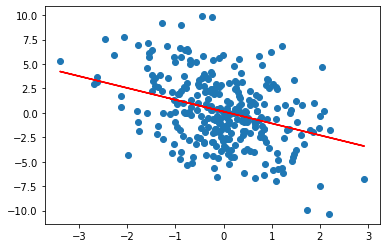

In [3]:
c.plot()

In [4]:
c.get_weights()

(-1.2092165, 0.13172139)

In [5]:
c.get_training_time()

0.18505539999999954